In [41]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from math import log, sqrt, pi, exp
from scipy.stats import norm
from datetime import datetime, date
import numpy as np
import pandas as pd
from pandas import DataFrame

In [42]:
#Option pricing functions from 
#https://medium.com/swlh/calculating-option-premiums-using-the-black-scholes-model-in-python-e9ed227afbee
#Use this to check that results derived using simulations make sense 

def d1(S,K,T,r,sigma):
    return(log(S/K)+(r+sigma**2/2.)*T)/(sigma*sqrt(T))

def d2(S,K,T,r,sigma):
    return d1(S,K,T,r,sigma)-sigma*sqrt(T)

def bs_call(S,K,T,r,sigma):
    return S*norm.cdf(d1(S,K,T,r,sigma))-K*exp(-r*T)*norm.cdf(d2(S,K,T,r,sigma))
  
def bs_put(S,K,T,r,sigma):
    return K*exp(-r*T)-S*bs_call(S,K,T,r,sigma)


#Geometric Brownian motion path generator function for simulations
#Code found here 
#https://stackoverflow.com/questions/45021301/geometric-brownian-motion-simulation-in-python
def gen_paths(S0, r, sigma, T, M, I):
    dt = float(T) / M
    paths = np.zeros((M + 1, I), np.float64)
    paths[0] = S0
    for t in range(1, M + 1):
        rand = np.random.standard_normal(I)
        paths[t] = paths[t - 1] * np.exp((r - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) * rand)
    return paths

#### The following section of code attempts to describe how option prices evolve as variables fluctuate within a range
* Vary the strike price: this will mean that our ITM bar will rise and fall 
* Vary the vol to see how the spread of future possibilities changes
* Vary the starting price to see how it evolves from that point 

<Figure size 432x288 with 0 Axes>

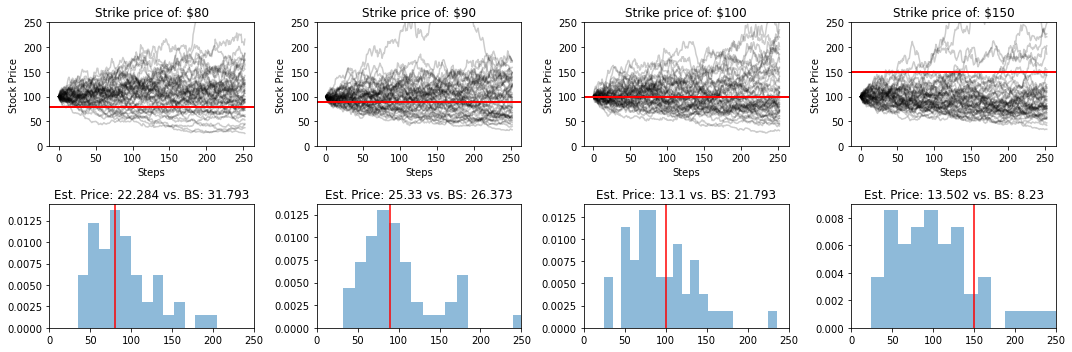

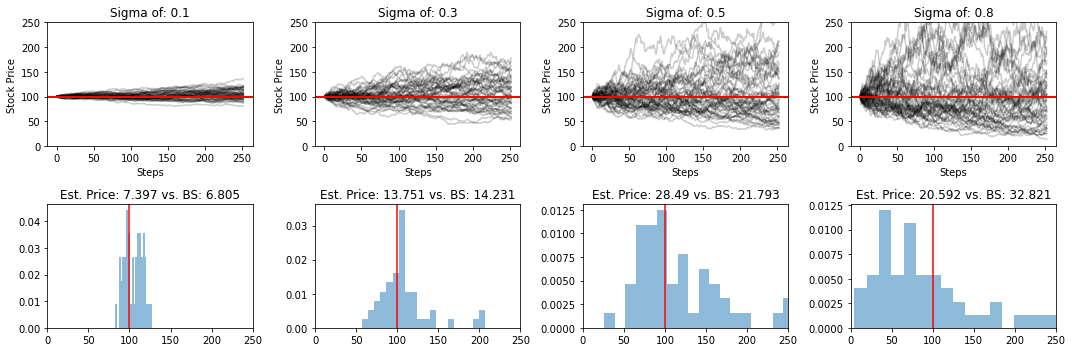

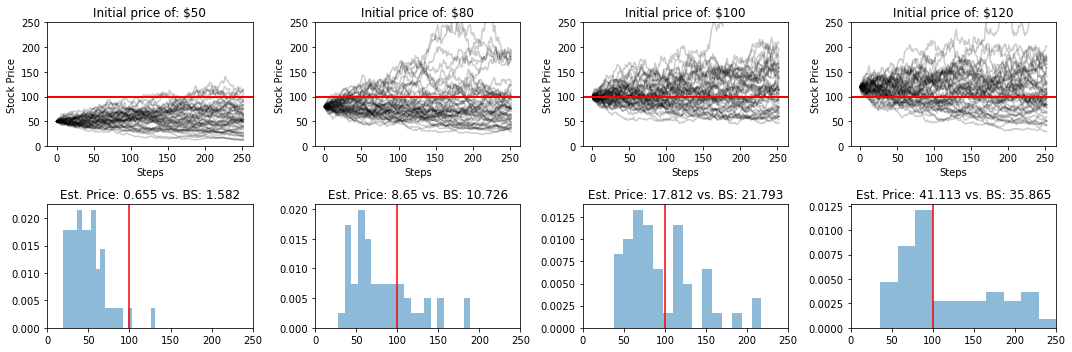

In [49]:
def plot_set(S0, r, sigma, T, N, i,K,title_in):
    for y in range(0,i-1):
        paths = gen_paths(S0, r, sigma, T, N, i)
        axs[0,idx].plot(paths[:,y],color='black',alpha = 0.2)
        axs[0,idx].axhline(y = K, color = 'red', linestyle = '-') 
        axs[0,idx].set_ylim(0,250)
        axs[0,idx].set_title(title_in)
        #mask = ma.masked_less(paths[:,y], K)
        #axs[idx].plot(mask,color='red',alpha = 0.2)
        axs[0,idx].set_xlabel('Steps')
        axs[0,idx].set_ylabel('Stock Price')
        
    call_payoff_est = round(np.average(np.maximum(0, paths[-1] - K))*discount_factor,3)    
    call_payoff_BS = round(bs_call(S0,K,T,r,sigma),3)
    axs[1,idx].hist(paths[-1], alpha=0.5, bins=20, density=True)
    axs[1,idx].set_title(f"Est. Price: {call_payoff_est} vs. BS: {call_payoff_BS}")
    axs[1,idx].set_xlim(0,250)
    axs[1,idx].axvline(x = K, color = 'r', label = 'axvline - full height')
        
        
plt.tight_layout()      
np.random.seed(123)
import numpy.ma as ma
#This section of code defines a range for each parameter of interest
#then it will loop over the range for a given parameter, and will plot the stored result 
S0 = 100
K = 130
r = 0.05
sigma = 0.50
T = 1
N = 252
i = 50
discount_factor = np.exp(-r * T)



####### Plot for different strike
K_set =[80,90,100,150]
fig, axs = plt.subplots(2,len(K_set), figsize=(15, 5))
for idx,val in enumerate(K_set):
    K = val
    in_title = f"Strike price of: ${val}"
    plot_set(S0, r, sigma, T, N, i,K,in_title)
  
fig.tight_layout()
####### Plot for different VOL
K=100
sigma_set =[.1,.3,.5,.8]
fig, axs = plt.subplots(2,len(sigma_set), figsize=(15, 5))
for idx,val in enumerate(sigma_set):
    sigma = val
    in_title = f"Sigma of: {val}"
    plot_set(S0, r, sigma, T, N, i,K,in_title)
fig.tight_layout()

####### Plot for different starting
sigma = 0.5
start_set =[50,80,100,120]
fig, axs = plt.subplots(2,len(start_set), figsize=(15, 5))
for idx,val in enumerate(start_set):
    S0 = val
    in_title = f"Initial price of: ${val}"
    plot_set(S0, r, sigma, T, N, i,K,in_title)
fig.tight_layout()



# plt.title('Simulations %d Steps %d Sigma %.2f r %.2f S0 %.2f' % (i, N, sigma, r, S0))
# plt.xlabel('Steps')
# plt.ylabel('Stock Price')
# plt.show()

In [75]:
np.random.seed(123)

from matplotlib import animation

#This section of code defines a range for each parameter of interest
#then it will loop over the range for a given parameter, and will plot the stored result 
S0 = 100
K = 130
r = 0.05
sigma = 0.50
T = 1
N = 252
i = 50
discount_factor = np.exp(-r * T)

#Generate the paths you need plots 
for y in range(0,i-1):
    paths = gen_paths(S0, r, sigma, T, N, i)
    

def payoff(pi,S0):
    return min(pi-S0,0)

        
def animate_func(num):
    axs.clear()
    print(num)
    p = np.linspace(50, 150, 100)
    K = p[num]
    pay_curve =  np.array([payoff(pi,S0) for pi in p])
    price_curve = np.array([bs_call(S0,pi,T,r,sigma) for pi in p])
    axs[0].plot(paths,color='black',alpha = 0.2)
    axs[0].axhline(y = K, color = 'red', linestyle = '-') 
    axs[0].set_ylim(0,250)
    axs[0].set_title('test')
    #mask = ma.masked_less(paths[:,y], K)
    #axs[idx].plot(mask,color='red',alpha = 0.2)
    axs[0].set_xlabel('Steps')
    axs[0].set_ylabel('Stock Price')
    
    call_payoff_est = round(np.average(np.maximum(0, paths[-1] - K))*discount_factor,3)    
    call_payoff_BS = round(bs_call(S0,K,T,r,sigma),3)
    axs[1].hist(paths[-1], alpha=0.5, bins=20, density=True)
    axs[1].set_title(f"Est. Price: {call_payoff_est} vs. BS: {call_payoff_BS}")
    axs[1].set_xlim(0,250)
    axs[1].axvline(x = K, color = 'r', label = 'axvline - full height')
    axs[2].plot(p,pay_curve,color='black')   
    axs[2].plot(p,price_curve) 
    return fig  

#use the defines function to visualize 
fig, axs = plt.subplots(3,1, figsize=(5, 8))
%matplotlib ipympl
line_ani = animation.FuncAnimation(fig, animate_func, interval=1,frames=5)
plt.show()

0
36
0
0


1
2
2
38
2
2
3
3
39
3
3
4
4
40
4
4
0
0
41
0
0
0
0
42
0
0
1
1
43
1
1
2
2
44
2
2
3
3
45
3
3
4
4
46
4
4
0
0
47
0
0
0
0
48
0
0
1
1
49
1
1
2
2
50
2
2
3
3
51
3
3
4
4
52
4
4
0
0
53
0
0
0
0
54
0
0
1
1
55
1
1
2
2
56
2
2
3
3
57
3
3
4
4
58
4
4
0
0
59
0
0
0
0
60
0
0
1
1
61
1
1
2
2
62
2
2
3
3
63
3
3
4
4
64
4
4
0
0
65
0
0
0
0
66
0
0
1
1
67
1
1
2
2
68
2
2
3
3
69
3
3
4
4
70
4
4
0
0
71
0
0
0
0
72
0
0
1
1
73
1
1
2
2
74
2
2
3
3
75
3
3
4
4
76
4
4
0
0
77
0
0
0
0
78
0
0
1
1
79
1
1
2
2
80
2
2
3
3
81
3
3
4
4
82
4
4
0
0
83
0
0
0
0
84
0
0
1
1
85
1
1
2
2
86
2
2
3
3
87
3
3
4
4
88
4
4
0
0
89
0
0
0
0
90
0
0
1
1
91
1
1
2
2
92
2
2
3
3
93
3
3
4
4
94
4
4
0
0
95
0
0
0
0
96
0
0
1
1
97
1
1
2
2
98
2
2
3
3
99
3
3
4
4
0
4
4
0
0
0
0
0
0
0
1
0
0
1
1
2
1
1
2
2
3
2
2
3
3
4
3
3
4
4
5
4
4
0
0
6
0
0
0
0
7
0
0
1
1
8
1
1
2
2
9
2
2
3
3
10
3
3
4
4
11
4
4
0
0
12
0
0
0
0
13
0
0
1
1
14
1
1
2
2
15
2
2
3
3
16
3
3
4
4
17
4
4
0
0
18
0
0
0
0
19
0
0
1
1
20
1
1
2
2
21
2
2
3
3
22
3
3
4
4
23
4
4
0
0
24
0
0
0
0
25
0
0
1
1
26
1
1
2
2
27
2
2
3
3
28
3